In [349]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

In [295]:
df = pd.read_csv('google_playstore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
75,Super Cars Wallpapers And Backgrounds,AUTO_AND_VEHICLES,4.6,197,3.4M,"50,000+",Free,0,Everyone,Auto & Vehicles,14-Jun-18,1.3,4.0 and up
7146,Antenna Tool,TOOLS,4.2,522,2.9M,"50,000+",Free,0,Everyone,Tools,26-Oct-17,2.2 Free,4.0.3 and up
2397,Paramedic Pocket Prep,MEDICAL,4.3,460,13M,"10,000+",Free,0,Everyone,Medical,12-Jul-18,4.5.2,4.4 and up
6269,Bitmoji – Your Personal Emoji,FAMILY,4.6,2312084,Varies with device,"100,000,000+",Free,0,Teen,Entertainment,25-Jul-18,Varies with device,4.3 and up
8280,Robin - DC Movie Collection,FAMILY,NaN,1,2.3M,500+,Free,0,Everyone,Entertainment,19-Nov-17,1.0.1,4.0 and up


### Data Cleaning

#### Checking for missing values in columns

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<Axes: >

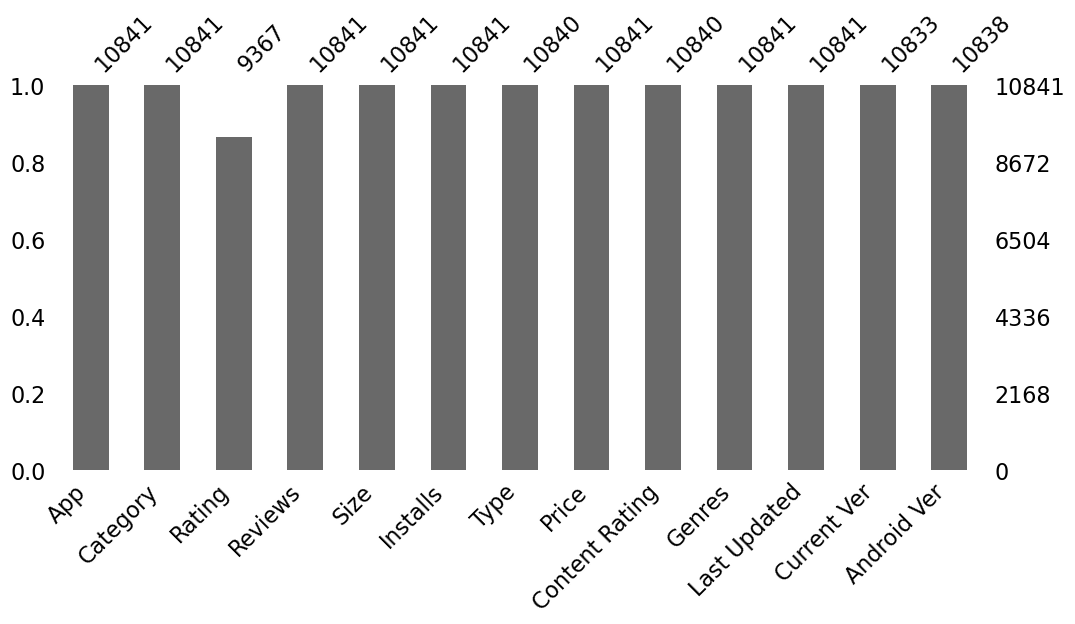

In [297]:
msno.bar(df, figsize=(12, 5))

<Axes: >

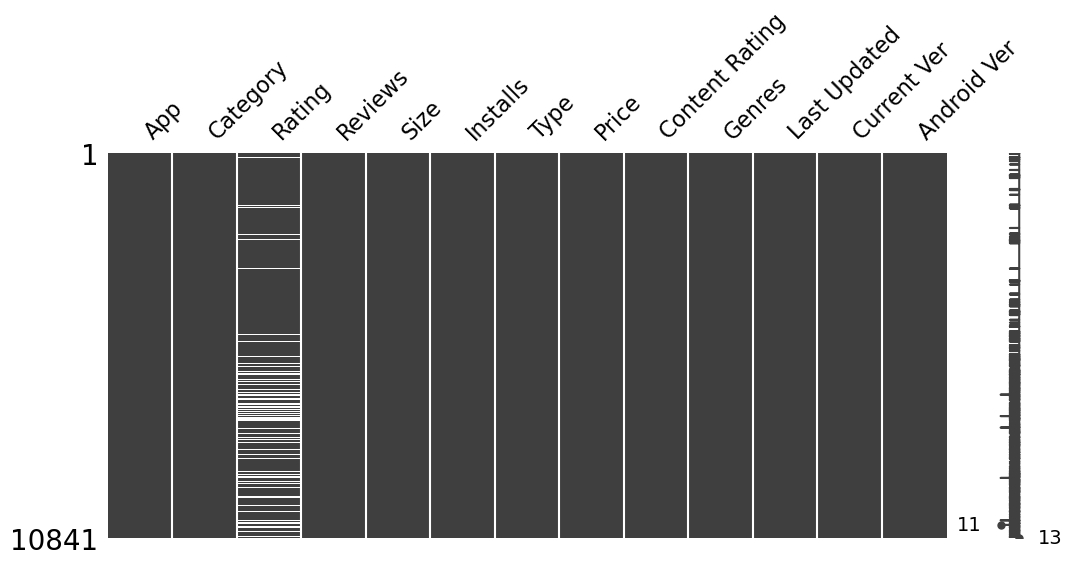

In [298]:
msno.matrix(df, figsize=(12, 5))

In [299]:
df.isna().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [300]:
df.loc[df['Rating'].isna()].sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8160,Modlitební knížka CZ,BOOKS_AND_REFERENCE,NaN,4,18M,500+,Free,0,Everyone,Books & Reference,4-Feb-18,4,4.0.3 and up
7121,WRLP CB Repeater,FAMILY,NaN,14,4.9M,"1,000+",Free,0,Teen,Entertainment,21-Jul-18,1.1.11,2.1 and up
7203,C-E Federal Credit Union,FINANCE,NaN,1,2.8M,500+,Free,0,Everyone,Finance,23-Mar-18,3.0.6,4.1 and up
2529,Breastfeeding Tracker Baby Log,MEDICAL,NaN,6,23M,100+,Free,0,Everyone,Medical,20-Jul-18,1.3.5,5.0 and up
8607,DN Radio FM,NEWS_AND_MAGAZINES,NaN,0,3.8M,10+,Free,0,Teen,News & Magazines,15-Jul-16,1.1,2.3 and up


#### Cleaning columns from missing and invalid values

<Axes: >

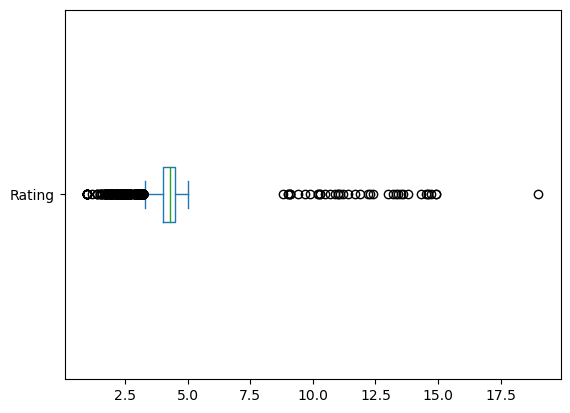

In [301]:
df['Rating'].plot(kind='box', vert=False)

In [302]:
df['Rating'].describe()

count    9367.000000
mean        4.231419
std         0.732847
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [303]:
df.loc[df['Rating'] > 5].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
681,Adult Dirty Emojis,DATING,12.2,80,5.5M,"10,000+",Free,0,Teen,Dating,6-Nov-17,1,4.0.3 and up
2351,Brilliant Distinctions®,MEDICAL,11.0,78,72M,"50,000+",Free,0,Everyone,Medical,27-Jun-18,2.2.12,4.4 and up
2535,Patient Portal,MEDICAL,14.9,66,1.2M,"50,000+",Free,0,Everyone,Medical,25-Oct-16,1,4.0.3 and up
4226,How Old am I?,FAMILY,14.9,4635,3.9M,"1,000,000+",Free,0,Everyone,Entertainment,1-Jan-18,1.7,4.0 and up
4831,Z App,LIFESTYLE,11.7,405,25M,"50,000+",Free,0,Everyone,Lifestyle,22-Jun-18,4.2.45,4.4 and up


In [304]:
df.loc[df['Rating'] > 5, 'Rating'] = np.nan
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


#### Cleaning Reviews column to make it of numeric type

In [305]:
df.loc[df['Reviews'].str.contains('M')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
72,"Android Auto - Maps, Media, Messaging & Voice",AUTO_AND_VEHICLES,4.2,2M,16M,"10,000,000+",Free,0,Teen,Auto & Vehicles,11-Jul-18,Varies with device,5.0 and up
1778,Block Craft 3D: Building Simulator Games For Free,GAME,4.5,1M,57M,"50,000,000+",Free,0,Everyone,Simulation,5-Mar-18,2.10.2,4.0.3 and up
1781,Trivia Crack,GAME,4.5,6.4M,95M,"100,000,000+",Free,0,Everyone,Trivia,3-Aug-18,2.79.0,4.1 and up


In [306]:
df.loc[df['Reviews'].str.contains('M'), 'Reviews'] = (
    pd.to_numeric(
        df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M', '')
    ) * 1_000_000
).astype(str)
df['Reviews'] = pd.to_numeric(df['Reviews'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  float64
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


#### Handling duplicated apps

In [307]:
df.loc[df.duplicated(subset=['App'], keep=False)].sort_values(['App']).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490.0,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160.0,26M,"1,000,000+",Free,0,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12.0,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,15M,"100,000+",Free,0,Everyone,Health & Fitness,2-Aug-18,3.0.0,4.1 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506.0,15M,"100,000+",Free,0,Everyone,Health & Fitness,2-Aug-18,3.0.0,4.1 and up
3083,365Scores - Live Scores,SPORTS,4.6,666521.0,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246.0,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up


In [308]:
print(df.duplicated(subset=['App'], keep=False).sum())

1979


In [309]:
df.loc[df.duplicated(subset=['App'], keep=False) & ~df.duplicated(keep=False)].sort_values(['App']).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3083,365Scores - Live Scores,SPORTS,4.6,666521.0,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246.0,25M,"10,000,000+",Free,0,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up
1675,8 Ball Pool,GAME,4.5,14198297.0,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602.0,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344.0,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550.0,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910.0,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891.0,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604.0,52M,"100,000,000+",Free,0,Everyone,Sports,31-Jul-18,4.0.0,4.0.3 and up
662,95Live -SG#1 Live Streaming App,DATING,4.1,4954.0,15M,"1,000,000+",Free,0,Teen,Dating,1-Aug-18,8.7.2,4.2 and up


In [310]:
df.sort_values(by=['App', 'Reviews'], inplace=True)
df.drop_duplicates(subset=['App'], keep='last', inplace=True)

#### Formatting strings in Category column

In [311]:
df['Category'].value_counts()

Category
FAMILY                 1874
GAME                    945
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               105
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
PARENTING                60
ART_AND_DESIGN           60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

In [312]:
df['Category'] = df['Category'].str.replace('_', ' ').str.capitalize()
df['Category'].value_counts()

Category
Family                 1874
Game                    945
Tools                   827
Business                420
Medical                 395
Productivity            374
Personalization         374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health and fitness      288
Photography             281
News and magazines      254
Social                  239
Books and reference     221
Travel and local        219
Shopping                202
Dating                  170
Video players           164
Maps and navigation     131
Food and drink          112
Education               105
Entertainment            86
Auto and vehicles        85
Libraries and demo       83
Weather                  79
House and home           73
Events                   64
Parenting                60
Art and design           60
Comics                   56
Beauty                   53
Name: count, dtype: int64

#### Cleaning Installs column to make it of numeric type

In [313]:
df.loc[pd.to_numeric(df['Installs'], errors='coerce').isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
324,#NAME?,Comics,3.5,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,Social,4.5,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,2-Aug-18,5.03,4.1 and up
4541,.R,Tools,4.5,259.0,203k,"10,000+",Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,Communication,4.7,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
5940,058.ba,News and magazines,4.4,27.0,14M,100+,Free,0,Everyone,News & Magazines,6-Jul-18,1,4.2 and up


In [314]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace('+', '').str.replace(',', ''))
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
324,#NAME?,Comics,3.5,115.0,9.1M,10000,Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,Social,4.5,40467.0,22M,1000000,Free,0,Everyone,Social,2-Aug-18,5.03,4.1 and up
4541,.R,Tools,4.5,259.0,203k,10000,Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,Communication,4.7,573.0,53M,10000,Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
5940,058.ba,News and magazines,4.4,27.0,14M,100,Free,0,Everyone,News & Magazines,6-Jul-18,1,4.2 and up


#### Cleaning Size column to make it of numeric type

In [315]:
df.loc[df['Size'] == 'Varies with device'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7338,20 Minuten (CH),News and magazines,3.5,14153.0,Varies with device,1000000,Free,0,Everyone 10+,News & Magazines,3-Aug-18,Varies with device,Varies with device
7330,20 minutes (CH),News and magazines,3.7,4379.0,Varies with device,1000000,Free,0,Teen,News & Magazines,3-Aug-18,Varies with device,Varies with device
3448,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Personalization,4.2,115773.0,Varies with device,10000000,Free,0,Everyone,Personalization,22-May-18,Varies with device,4.1 and up
3151,2GIS: directory & navigator,Travel and local,4.5,768833.0,Varies with device,50000000,Free,0,Everyone,Travel & Local,30-Jul-18,Varies with device,Varies with device
4875,30 Day Ab Challenge FREE,Health and fitness,4.3,48253.0,Varies with device,1000000,Free,0,Everyone,Health & Fitness,13-Dec-17,Varies with device,Varies with device


In [316]:
df['Size'] = df['Size'].str.replace('Varies with device', '0')

In [317]:
df['Size'].str.contains(',').sum()

0

In [318]:
df.loc[df['Size'].str.contains('k')].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4541,.R,Tools,4.500000,259.0,203k,10000,Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4897,30-Day Ab Challenge Tracker,Health and fitness,3.500000,224.0,371k,10000,Free,0,Everyone,Health & Fitness,9-Jul-14,1.2.6,4.1 and up
6671,4-T's Bar-BQ & Catering,Shopping,4.197727,0.0,243k,10,Free,0,Everyone,Shopping,16-Jan-17,1.0.1,4.1 and up
4871,A-B repeater,Video players,4.400000,32.0,239k,5000,Free,0,Everyone,Video Players & Editors,18-May-18,1.8,3.0 and up
5035,AE Checkout Plugin,Shopping,3.800000,208.0,78k,10000,Free,0,Everyone,Shopping,11-Feb-15,1.3.1,2.3 and up


In [319]:
df.loc[df['Size'].str.contains('k'), 'Size'] = (
    pd.to_numeric(df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', ''))*1024
).astype(str)

In [320]:
df.loc[df['Size'].str.contains('M'), 'Size'] = (
    pd.to_numeric(df.loc[df['Size'].str.contains('M'), 'Size'].str.replace('M', ''))*1024*1024
).astype(str)

In [321]:
df['Size'] = pd.to_numeric(df['Size'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
324,#NAME?,Comics,3.5,115.0,9542041.6,10000,Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,Social,4.5,40467.0,23068672.0,1000000,Free,0,Everyone,Social,2-Aug-18,5.03,4.1 and up
4541,.R,Tools,4.5,259.0,207872.0,10000,Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,Communication,4.7,573.0,55574528.0,10000,Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
5940,058.ba,News and magazines,4.4,27.0,14680064.0,100,Free,0,Everyone,News & Magazines,6-Jul-18,1,4.2 and up


#### Cleaning Price column to make it of numeric type

In [322]:
df.loc[df['Price'] != '0'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7738,10 WPM Amateur ham radio CW Morse code trainer,Communication,3.5,10.0,3984588.8,100,Paid,$1.49,Everyone,Communication,12-May-18,2.1.4,2.1 and up
8219,"10,000 Quotes DB (Premium)",Books and reference,4.1,70.0,3670016.0,500,Paid,$0.99,Everyone,Books & Reference,30-Aug-13,1.3,2.1 and up
6760,17th Edition Cable Sizer,Books and reference,4.4,47.0,1468006.4,1000,Paid,$3.08,Everyone,Books & Reference,27-May-16,1.22,2.2 and up
7993,2 Amateur ham radio CW Morse code practice key...,Communication,4.8,6.0,3670016.0,100,Paid,$1.49,Everyone,Communication,5-Mar-18,1.0.9,1.6 and up
2385,2017 EMRA Antibiotic Guide,Medical,4.4,12.0,3984588.8,1000,Paid,$16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up


In [323]:
df.loc[df['Price'] == 'Free'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5240,AJ Concept Group App,House and home,4.197727,0.0,17825792.0,10,Free,Free,Everyone,House & Home,25-Jul-17,3,4.0.3 and up
7994,All Star Of CW,Family,4.197727,0.0,2516582.4,10,Free,Free,Everyone,Role Playing,6-Feb-18,2.03,4.0.3 and up
3188,American Airlines,Travel and local,3.700000,16980.0,0.0,5000000,Free,Free,Everyone,Travel & Local,18-Jul-18,Varies with device,Varies with device
4960,Anti Adware,Tools,3.900000,18751.0,3774873.6,1000000,Free,Free,Everyone,Tools,19-Jun-18,3.6,4.1 and up
3833,Atlan3D Navigation: Korea navigator,Maps and navigation,4.200000,22063.0,0.0,1000000,Free,Free,Everyone,Maps & Navigation,31-Jul-18,Varies with device,Varies with device


In [324]:
df['Price'] = df['Price'].str.replace('Free', '0')
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'])
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
324,#NAME?,Comics,3.5,115.0,9542041.6,10000,Free,0.00,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,Social,4.5,40467.0,23068672.0,1000000,Free,0.00,Everyone,Social,2-Aug-18,5.03,4.1 and up
4541,.R,Tools,4.5,259.0,207872.0,10000,Free,0.00,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,Communication,4.7,573.0,55574528.0,10000,Free,0.00,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
5940,058.ba,News and magazines,4.4,27.0,14680064.0,100,Free,0.00,Everyone,News & Magazines,6-Jul-18,1,4.2 and up
10252,1. FC Köln App,Sports,4.6,2019.0,42991616.0,100000,Free,0.00,Everyone,Sports,20-Jul-18,1.13.0,4.4 and up
1407,10 Best Foods for You,Health and fitness,4.0,2490.0,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up
8483,10 Minutes a Day Times Tables,Family,4.1,681.0,50331648.0,100000,Free,0.00,Everyone,Education,3-Jul-14,1.2,2.2 and up
7738,10 WPM Amateur ham radio CW Morse code trainer,Communication,3.5,10.0,3984588.8,100,Paid,1.49,Everyone,Communication,12-May-18,2.1.4,2.1 and up
8219,"10,000 Quotes DB (Premium)",Books and reference,4.1,70.0,3670016.0,500,Paid,0.99,Everyone,Books & Reference,30-Aug-13,1.3,2.1 and up


In [325]:
df['Distribution'] = 'Free'
df.loc[df['Price'] > 0, 'Distribution'] = 'Paid'
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
324,#NAME?,Comics,3.5,115.0,9542041.6,10000,Free,0.00,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up,Free
8532,+Download 4 Instagram Twitter,Social,4.5,40467.0,23068672.0,1000000,Free,0.00,Everyone,Social,2-Aug-18,5.03,4.1 and up,Free
4541,.R,Tools,4.5,259.0,207872.0,10000,Free,0.00,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up,Free
4636,/u/app,Communication,4.7,573.0,55574528.0,10000,Free,0.00,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up,Free
5940,058.ba,News and magazines,4.4,27.0,14680064.0,100,Free,0.00,Everyone,News & Magazines,6-Jul-18,1,4.2 and up,Free
10252,1. FC Köln App,Sports,4.6,2019.0,42991616.0,100000,Free,0.00,Everyone,Sports,20-Jul-18,1.13.0,4.4 and up,Free
1407,10 Best Foods for You,Health and fitness,4.0,2490.0,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,Free
8483,10 Minutes a Day Times Tables,Family,4.1,681.0,50331648.0,100000,Free,0.00,Everyone,Education,3-Jul-14,1.2,2.2 and up,Free
7738,10 WPM Amateur ham radio CW Morse code trainer,Communication,3.5,10.0,3984588.8,100,Paid,1.49,Everyone,Communication,12-May-18,2.1.4,2.1 and up,Paid
8219,"10,000 Quotes DB (Premium)",Books and reference,4.1,70.0,3670016.0,500,Paid,0.99,Everyone,Books & Reference,30-Aug-13,1.3,2.1 and up,Paid


### Data Analysis

#### App with the most reviews

In [326]:
df.sort_values(['Reviews'], ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
2544,Facebook,Social,4.1,78158306.0,0.0,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,Free
381,WhatsApp Messenger,Communication,4.4,69119316.0,0.0,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,Free
2604,Instagram,Social,4.5,66577446.0,0.0,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device,Free
382,Messenger – Text and Video Chat for Free,Communication,4.0,56646578.0,0.0,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device,Free
1879,Clash of Clans,Game,4.6,44893888.0,102760448.0,100000000,Free,0.0,Everyone 10+,Strategy,15-Jul-18,10.322.16,4.1 and up,Free


#### Category with the highest number of apps

In [328]:
df['Category'].value_counts().head()

Category
Family      1874
Game         945
Tools        827
Business     420
Medical      395
Name: count, dtype: int64

#### Most expensive app

In [329]:
df.sort_values(['Price'], ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4367,I'm Rich - Trump Edition,Lifestyle,3.600000,275.0,7654604.8,10000,Paid,400.00,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up,Paid
5358,I am Rich!,Finance,3.800000,93.0,23068672.0,1000,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up,Paid
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,Lifestyle,4.197727,0.0,41943040.0,0,Paid,399.99,Everyone,Lifestyle,1-Dec-17,MONEY,4.1 and up,Paid
4197,most expensive app (H),Family,4.300000,6.0,1572864.0,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up,Paid
5359,I am rich(premium),Finance,3.500000,472.0,988160.0,5000,Paid,399.99,Everyone,Finance,1-May-17,3.4,4.4 and up,Paid


#### Most expensive game

In [330]:
df.loc[df['Category'] == 'Game'].sort_values(['Price'], ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4203,The World Ends With You,Game,4.6,4108.0,13631488.0,10000,Paid,17.99,Everyone 10+,Arcade,14-Dec-15,1.0.4,4.0 and up,Paid
10782,Trine 2: Complete Story,Game,3.8,252.0,11534336.0,10000,Paid,16.99,Teen,Action,27-Feb-15,2.22,5.0 and up,Paid
6341,Blackjack Verite Drills,Game,4.6,17.0,4928307.2,100,Paid,14.00,Teen,Casino,9-Jul-17,1.1.10,3.0 and up,Paid
1838,Star Wars ™: DIRTY,Game,4.5,38207.0,15728640.0,100000,Paid,9.99,Teen,Role Playing,19-Oct-15,1.0.6,4.1 and up,Paid
6198,Backgammon NJ for Android,Game,4.4,1644.0,15728640.0,10000,Paid,7.99,Everyone,Board,5-Apr-17,4.1,2.3.3 and up,Paid


#### Most popular Finance app

In [332]:
df.loc[df['Category'] == 'Finance'].sort_values(['Installs'], ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
5601,Google Pay,Finance,4.2,348132.0,0.0,100000000,Free,0.0,Everyone,Finance,26-Jul-18,2.70.206190089,Varies with device,Free
1156,PayPal,Finance,4.3,659760.0,49283072.0,50000000,Free,0.0,Everyone,Finance,18-Jul-18,6.28.0,4.4 and up,Free
1081,İşCep,Finance,4.5,381788.0,33554432.0,10000000,Free,0.0,Everyone,Finance,2-Aug-18,3.22.0,4.1 and up,Free
1168,Wells Fargo Mobile,Finance,4.4,250719.0,38797312.0,10000000,Free,0.0,Everyone,Finance,31-Jul-18,6.8.0.109,5.0 and up,Free
1169,Capital One® Mobile,Finance,4.6,510401.0,82837504.0,10000000,Free,0.0,Everyone,Finance,1-Aug-18,5.38.1,5.0 and up,Free


#### Teen Game with the most reviews

In [337]:
df.query("Category == 'Game' and `Content Rating` == 'Teen'").sort_values(['Reviews'], ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
3912,Asphalt 8: Airborne,Game,4.5,8389714.0,96468992.0,100000000,Free,0.0,Teen,Racing,4-Jul-18,3.7.1a,4.0.3 and up,Free
5417,Mobile Legends: Bang Bang,Game,4.4,8219586.0,103809024.0,100000000,Free,0.0,Teen,Action,24-Jul-18,1.2.97.3042,4.0.3 and up,Free
1988,Hungry Shark Evolution,Game,4.5,6074627.0,104857600.0,100000000,Free,0.0,Teen,Arcade,25-Jul-18,6.0.0,4.1 and up,Free
10327,Garena Free Fire,Game,4.5,5534114.0,55574528.0,100000000,Free,0.0,Teen,Action,3-Aug-18,1.21.0,4.0.3 and up,Free
3967,Pixel Gun 3D: Survival shooter & Battle Royale,Game,4.5,4487182.0,57671680.0,50000000,Free,0.0,Teen,Action,4-Jul-18,15.1.2,4.0.3 and up,Free


#### Free Game with the most reviews

In [338]:
df.query("Category == 'Game' and Type == 'Free'").sort_values(['Reviews'], ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
1879,Clash of Clans,Game,4.6,44893888.0,102760448.0,100000000,Free,0.0,Everyone 10+,Strategy,15-Jul-18,10.322.16,4.1 and up,Free
1917,Subway Surfers,Game,4.5,27725352.0,79691776.0,1000000000,Free,0.0,Everyone 10+,Arcade,12-Jul-18,1.90.0,4.1 and up,Free
1878,Clash Royale,Game,4.6,23136735.0,101711872.0,100000000,Free,0.0,Everyone 10+,Strategy,27-Jun-18,2.3.2,4.1 and up,Free
1966,Candy Crush Saga,Game,4.4,22430188.0,77594624.0,500000000,Free,0.0,Everyone,Casual,5-Jul-18,1.129.0.2,4.1 and up,Free
1908,My Talking Tom,Game,4.5,14892469.0,0.0,500000000,Free,0.0,Everyone,Casual,19-Jul-18,4.8.0.132,4.1 and up,Free


#### How many Terabytes of storage were transfered for the most popular Lifestyle app

In [343]:
app = df.query("Category == 'Lifestyle'").sort_values(['Installs'], ascending=False).iloc[0]
app

App                   Tinder
Category           Lifestyle
Rating                   4.0
Reviews            2789775.0
Size              71303168.0
Installs           100000000
Type                    Free
Price                    0.0
Content Rating    Mature 17+
Genres             Lifestyle
Last Updated        2-Aug-18
Current Ver            9.5.0
Android Ver       4.4 and up
Distribution            Free
Name: 4587, dtype: object

In [350]:
print(math.floor((app['Installs'] * app['Size'])/(1024*1024*1024*1024)), "TBs")

6484 TBs
